Madison-Taylor Fortich  
9291000361

**1) Process:**   
- a) Load the dataset  
- b) Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
X = data.iloc[:, [3,4]].values

**2) Build Models:**

a) K-Means Clustering Model:  
- i) Use the elbow method to draw a plot, and find the optimal number of clusters.  
- ii)Train the K-Means model with the optimized K  

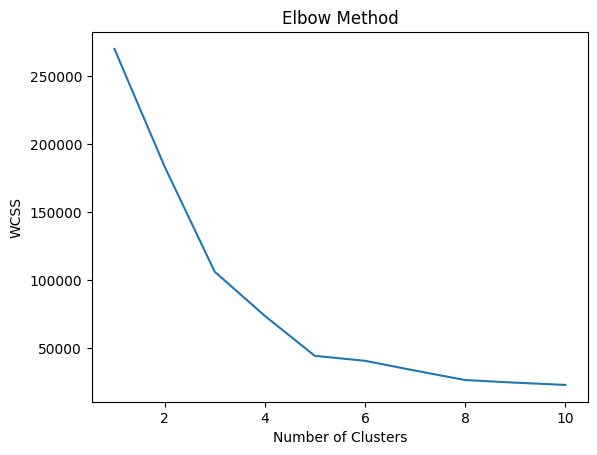

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

the optimal k is 5 - there is no rapid change from 5 to 6

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_pred = kmeans.fit_predict(X)
y_kmeans_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

**b) Hierarchical Clustering Model:**
- i) Use the dendrogram method to draw a plot, and find the optimal number of clusters.  
- ii)Train the Hierarchical Model with optimized n_clusters.

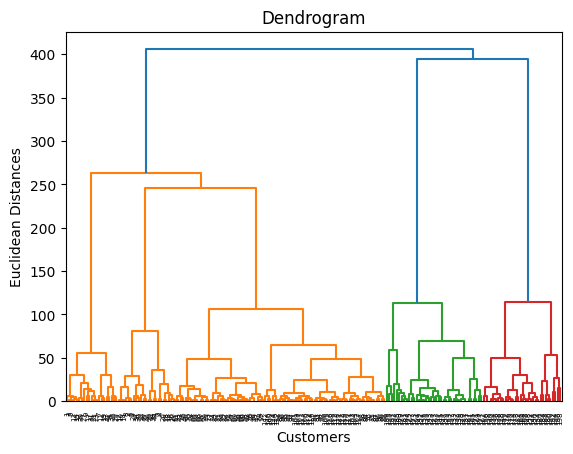

In [7]:
import scipy.cluster.hierarchy as sch

dedrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

the optimal  number is 5 

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

**3) Evaluation:**
- a) Visualize the result of both of those 2 models, mark different classes in different colors, and scatter the cluster centers of the K-Means model.  
- b) Write a brief description of your results.**

K-Means

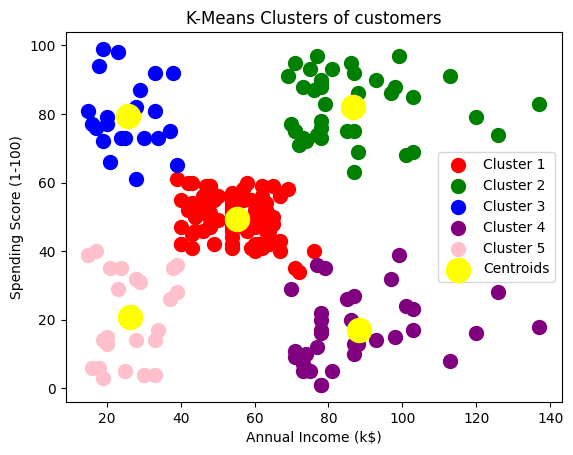

In [9]:
plt.scatter(X[y_kmeans_pred == 0, 0], X[y_kmeans_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_pred == 1, 0], X[y_kmeans_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans_pred == 2, 0], X[y_kmeans_pred == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans_pred == 3, 0], X[y_kmeans_pred == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans_pred == 4, 0], X[y_kmeans_pred == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Centroids')
plt.title('K-Means Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel( 'Spending Score (1-100)')
plt.legend()
plt.show()

Hierarchical

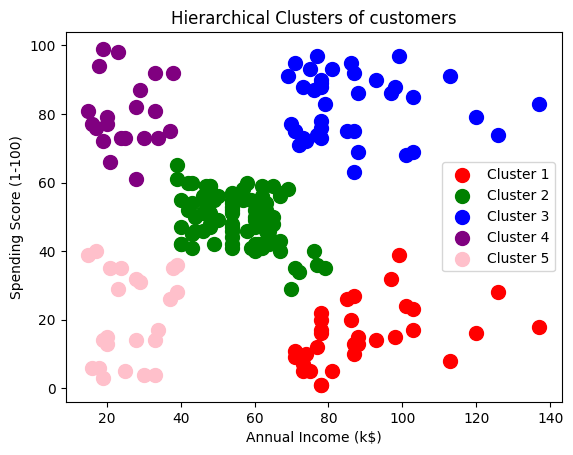

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.title('Hierarchical Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel( 'Spending Score (1-100)')
plt.legend()
plt.show()

since both models have 5 clusters, I will be describing the K-Means:  
- Cluster 1 has an income at about 40k–70k and a spending score between 40-60.  
- Cluster 2 has a high income of between 60k–140k and a spending score between 60–100.  
- Cluster 4 has about the same income as Cluster 2, but a lower spending score of 1-40.  
- Cluster 3 has a low income of 20k–45k but a high spending score of 60–100.  
- Cluster 5 has a low income around 20k–40k and a low spending score of 1-40

Overall these clusters show different customer habits. For example, there is high income/high spending, high income/low spending, low income/high spending, low income/low spending, and average income/average spending customers. 